# <font color=Red>Titanic Project</font>

The RMS Titanic was known as the unsinkable ship and was the largest, most luxurious passenger ship of its time. Sadly, the British ocean liner sank on April 15, 1912, killing over 1500 people while just 705 survived.

In this article, we will analyze the Titanic data set and make two predictions. One prediction to see which passengers on board the ship would survive and then another prediction to see if we would’ve survived.

#### <font color= Green>Data Set Column Descriptions</font>
#### 1.pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#### 2.Survived: Survival (0 = No; 1 = Yes)
#### 3.Name: Name
#### 4.Sex: Sex
#### 5.Age: Age
####       Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
#### 6.SibSp: Number of siblings/spouses aboard
####      The dataset defines family relations in this way:
####       Sibling= brother, sister, stepbrother, stepsister
####       Spouse= husband, wife (mistresses and fiancés were ignored)
#### 7.Parch: Number of parents/children aboard
####       Parent= mother, father
####      Child= daughter, son, stepdaughter, stepson
####      Some children traveled only with a nanny, therefore parch=0 for them.
####      The dataset defines family relations in this way:

#### 8.Fare: Passenger fare (British pound)
#### 9.Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
####      adult_male: A male 18 or older (0 = No, 1=Yes)
####      deck: Deck of the ship
####      who: man (18+), woman (18+), child (<18)
####      alive: Yes, no
####      Embarked_town: Port of embarkation ( Cherbourg, Queenstown, Southampton)
#### 10.Class: Passenger class (1st; 2nd; 3rd)
#### alone: 1= alone, 0= not alone ( you have at least 1 sibling, spouse, parent or child on board)

# <font color=blue>Data Analysis Phase</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
plt.style.use('seaborn')
from pylab import rcParams  # for plotting box plot, to check outliers

#model developemnt libraries
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [2]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [3]:
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# <font color=blue>The Data</font>

## Reading data frame and understanding data

In [4]:
df_train = pd.read_csv("titanic_train.csv")

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
470,471,0,3,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.2500,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
296,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,NaN,C
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.7500,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
575,576,0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
105,106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S
158,159,0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [8]:
df_train.shape

(891, 12)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## summery of data

In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### <font color=green>As per problem statement, output variable in continuous number. So it is regression problem.</font>

### To check the duplicate the value

In [11]:

duplicated_values = df_train.duplicated()
print(duplicated_values.sum())

0


### <font color=green>In our dataset no duplicate value so we dont require to drop the duplicate value</font> 

### check unique values in dataset

In [12]:

df_train.apply(lambda x: len(x.unique()))

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

# Exploratory Data Analysis


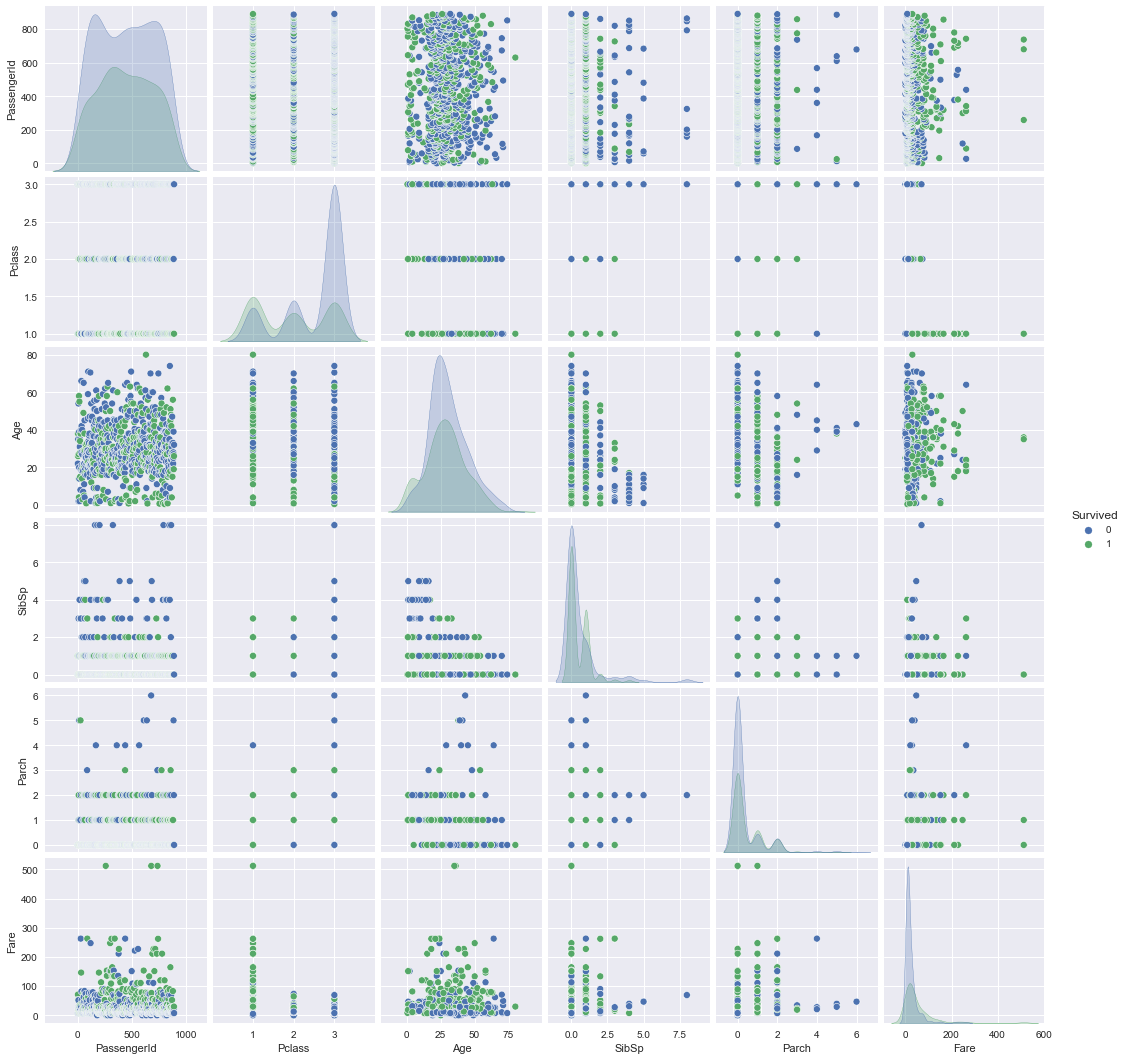

In [13]:
sns.pairplot(df_train, hue='Survived')

## Observations

### As we can see that the features are overlap with each other
### Hence the classification is non linear

## Check The Null Value

## 1.Missing Data

In [14]:
df_train.isnull() #Checking summary of how many null values prsent

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df_train.isnull().sum() # Getting the total null value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Since they are only 3 feature with  missing values, we need to find the relationship between feature with missing values and survived

# Handling the missing values:

### Impact Of missing value i.e age over the target

# Feature : Age 

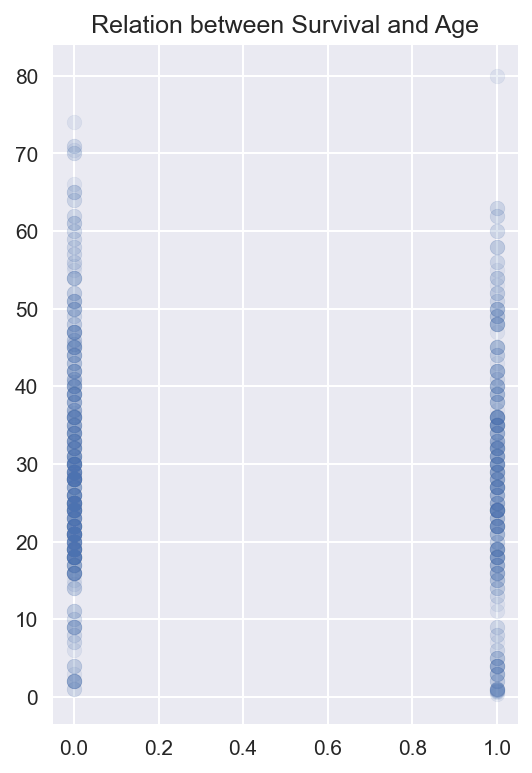

In [16]:
plt.figure(figsize=(4,6),dpi = 150)
plt.scatter(df_train.Survived, df_train.Age, alpha = 0.1) 
plt.title('Relation between Survival and Age') 
plt.show() 

### Observation
### from the above graph there is survival rate is denser in age range 10–30 and and mortality rate is denser in range 30–50.


### Hence Age column has higher impact over the survival rate.
### So we Replacing the missing values in the “Age” column with the median value 


In [17]:
df_train.shape

(891, 12)

In [18]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

In [20]:
df_train.shape

(891, 12)

In [21]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Feature: Cabin,Ticket,Name coloumn will not affect the surviving rate
### Dropping  these column from the data frame.

In [22]:
df_train.drop('Cabin', axis=1, inplace=True)

In [23]:
df_train.drop('Name', axis=1, inplace=True)

In [24]:
df_train.drop('Ticket', axis=1, inplace=True)

In [25]:
df_train.drop('PassengerId', axis=1, inplace=True)

In [26]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## embarked column having only two missing value.
### so we replace with mode value.
### Finding the mode value of the “Embarked” column as it will have occurred the maximum number of times

In [27]:
df_train['Embarked'].fillna(df_train['Embarked'].mode(), inplace=True)
df_train.Embarked.dropna(inplace=True)

In [28]:
df_train['Embarked'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [29]:
df_train1 = df_train.copy()
np.where(df_train['Embarked'] == 'nan', 'Q', df_train['Embarked'])

array(['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S', 'S',
       'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'Q', 'S', 'S', 'S',
       'C', 'S', 'Q', 'S', 'C', 'C', 'Q', 'S', 'C', 'S', 'C', 'S', 'S',
       'C', 'S', 'S', 'C', 'C', 'Q', 'S', 'Q', 'Q', 'C', 'S', 'S', 'S',
       'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', nan, 'S', 'S', 'C',
       'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'C', 'S', 'Q',
       'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'Q', 'S', 'C', 'S',
       'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S

In [30]:
df_train.dropna(inplace=True)

In [31]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [32]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

## Now let us check again there is any missing value that are prsent in our dataset 

In [33]:
df_train.isnull().sum() # It is clear from missing value

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Checking the categerical coloumn 

In [34]:
df_train.describe(include="O")

,Sex,Embarked
count,889,889
unique,2,3
top,male,S
freq,577,644


In [35]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


## Now let us checking checking the other feature that affect survival rate


# Feature: Class

,Pclass,Survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


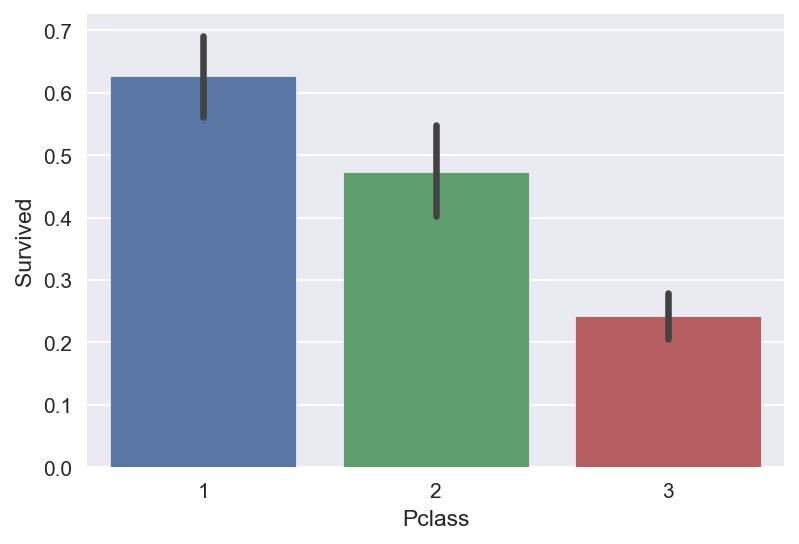

In [37]:
plt.figure(figsize=(6,4),dpi = 150)
sns.barplot(x='Pclass', y='Survived', data=df_train)
df_train.groupby('Pclass', as_index=False).Survived.mean()

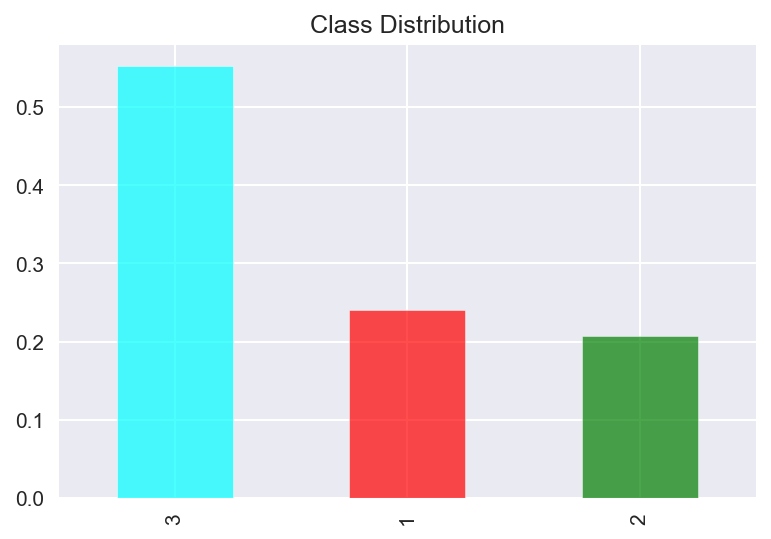

In [38]:
plt.figure(figsize=(6,4),dpi = 150)
df_train.Pclass.value_counts(normalize = True).plot(kind='bar', alpha = 0.7,color=['cyan', 'red', 'green']) 
plt.title('Class Distribution')  
plt.show() 

## From the above graph which shows almost 55% of the passengers belong to 3rd class, 25% belong to 1st class and rest 20% belong to 2nd class respectively.

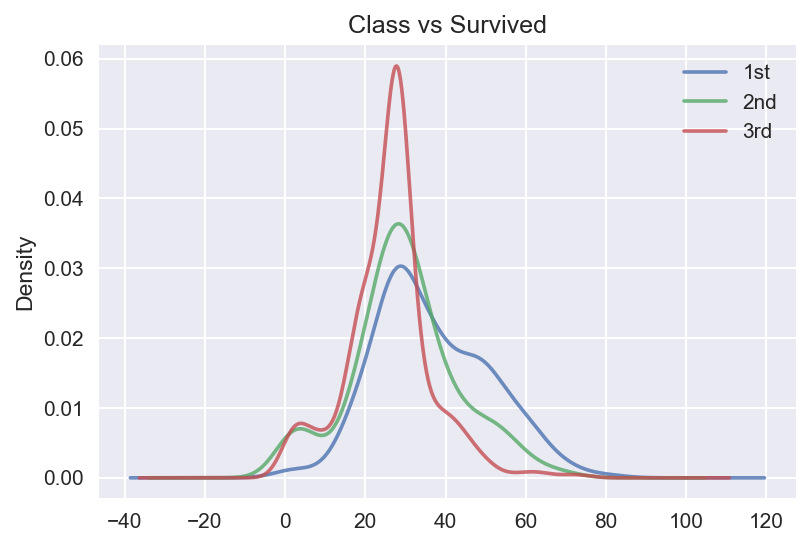

In [39]:
plt.figure(figsize=(6,4),dpi = 150)
for i in [1,2,3]: 
    df_train.Age[df_train.Pclass == i].plot(kind = 'kde', alpha = 0.8) 
plt.title("Class vs Survived") 
plt.legend(("1st", "2nd", "3rd")) 
plt.show()

## The above plot shows the younger passengers are more among the 3rd class passengers and older passengers are among the 1st class ones. The middle aged ones are in 2nd class mostly.

# Feature: Embarked

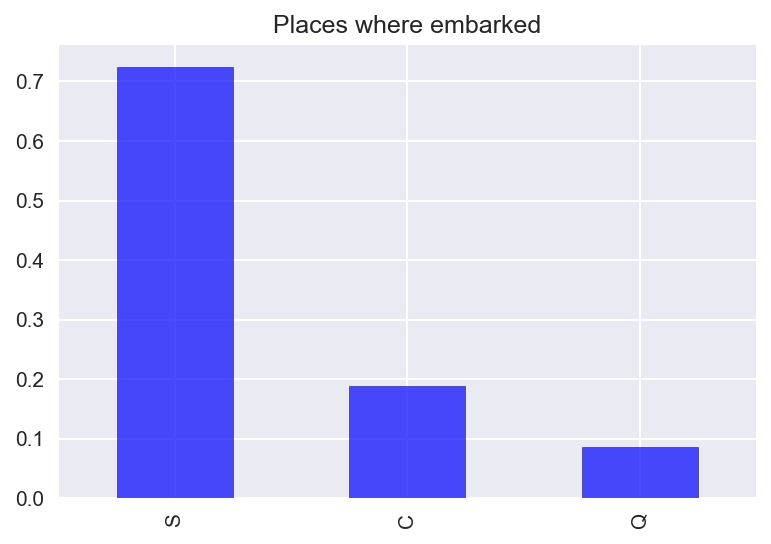

In [40]:
plt.figure(figsize=(6,4),dpi = 150)
df_train.Embarked.value_counts(normalize = True).plot(kind='bar',alpha = 0.7,color= 'blue',edgecolor='black') 
plt.title('Places where embarked')  
plt.show() 

## The destination of most passangers were Southampton followed by Cherbourg, Queenstown

## so graph shows the figs are around 70%, 20% and 10% respectively

<AxesSubplot:xlabel='Survived', ylabel='count'>

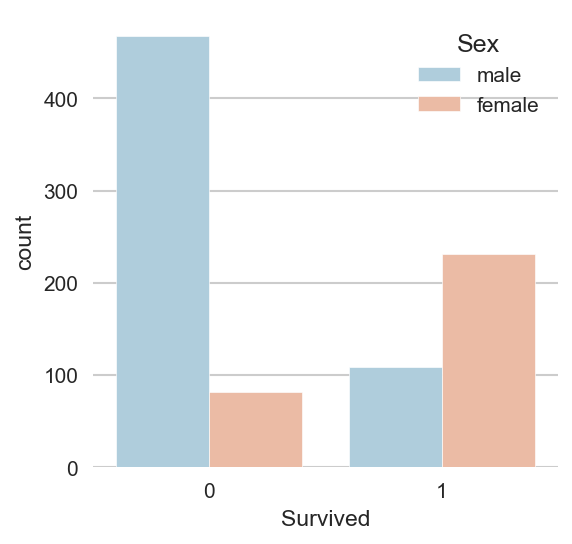

In [41]:
plt.figure(figsize=(4,4),dpi = 150)
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df_train,palette='RdBu_r')

# Male Survived(0)

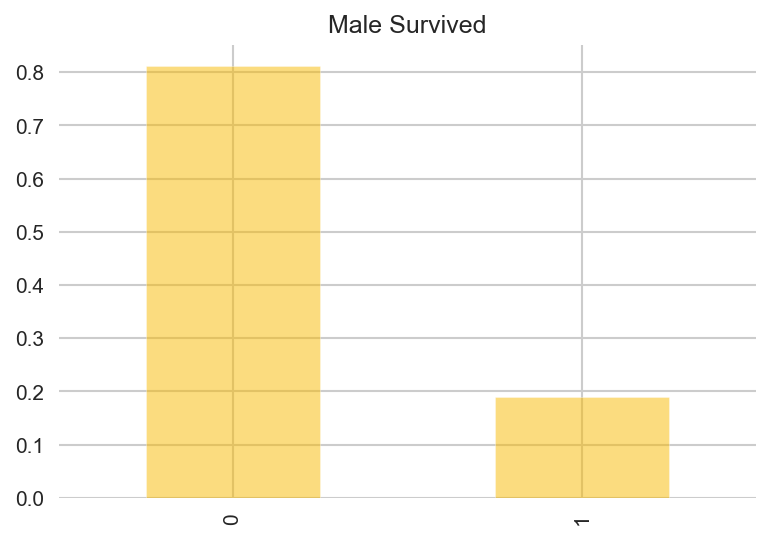

In [42]:
plt.figure(figsize=(6,4),dpi = 150)
m_color = '#F8BA00' 
df_train.Survived[df_train.Sex == 'male'].value_counts(normalize = True).plot(kind='bar', alpha = 0.5, color = m_color) 
plt.title('Male Survived') 
plt.show()

# Female Survived(1)


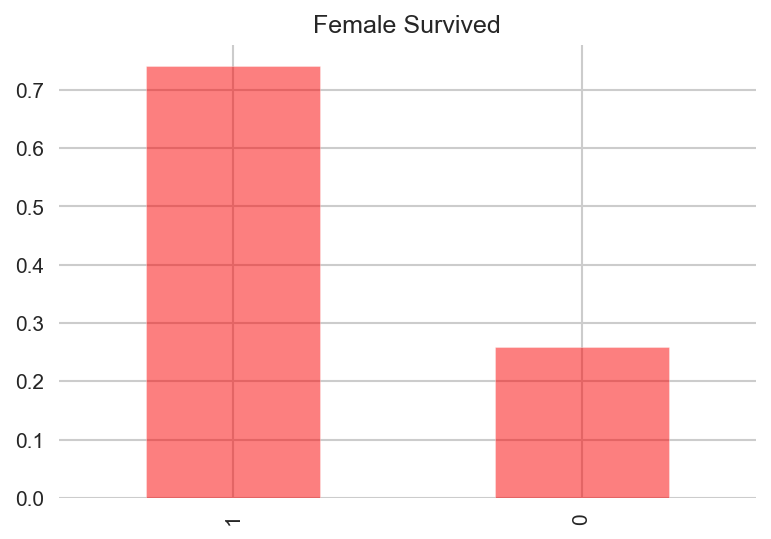

In [43]:
plt.figure(figsize=(6,4),dpi = 150)
f_color = '#FA0000' 
df_train.Survived[df_train.Sex == 'female'].value_counts(normalize = True).plot(kind='bar', alpha = 0.5, color = f_color) 
plt.title('Female Survived') 
plt.show() 


## Among male passengers, 80% died (20% survived)

# Gender Survived

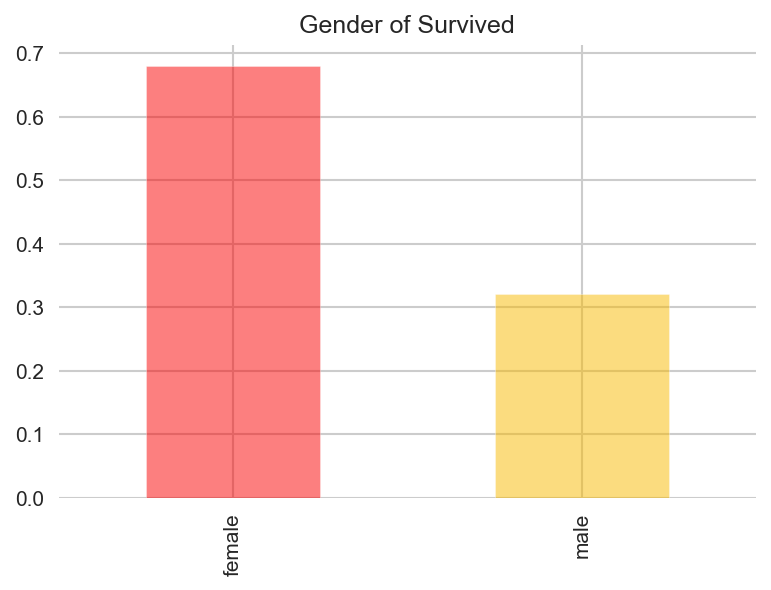

In [44]:
plt.figure(figsize=(6,4),dpi = 150)
df_train.Sex[df_train.Survived == 1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5, color = [f_color, m_color]) 
plt.title('Gender of Survived') 
plt.show() 

## Among female passengers, only 30% died (70% survived)

## CLASS VS SURVIVED

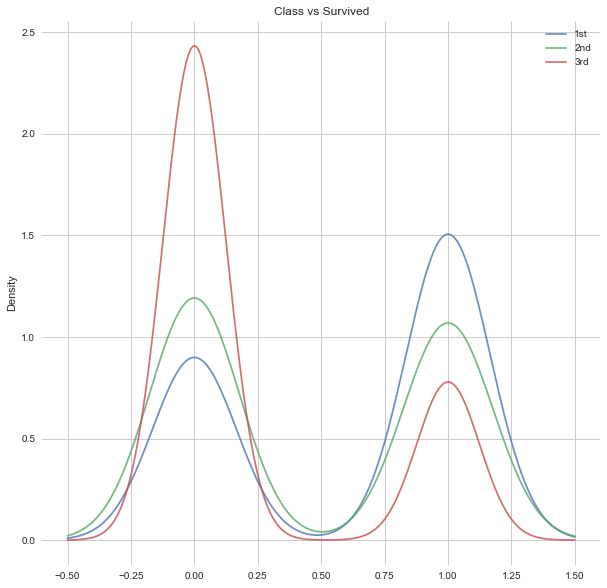

In [45]:
plt.figure(figsize=(10,10))
for i in [1,2,3]: 
    df_train.Survived[df_train.Pclass == i].plot(kind = 'kde', alpha = 0.8) 
plt.title("Class vs Survived") 
plt.legend(("1st", "2nd", "3rd")) 
plt.show() 

## 1) 3rd class passengers have very high mortality rate compared to 1st class passengers
## 2)1st class passengers have higher survival rate compared to 3rd class passengers(see blue and green line)

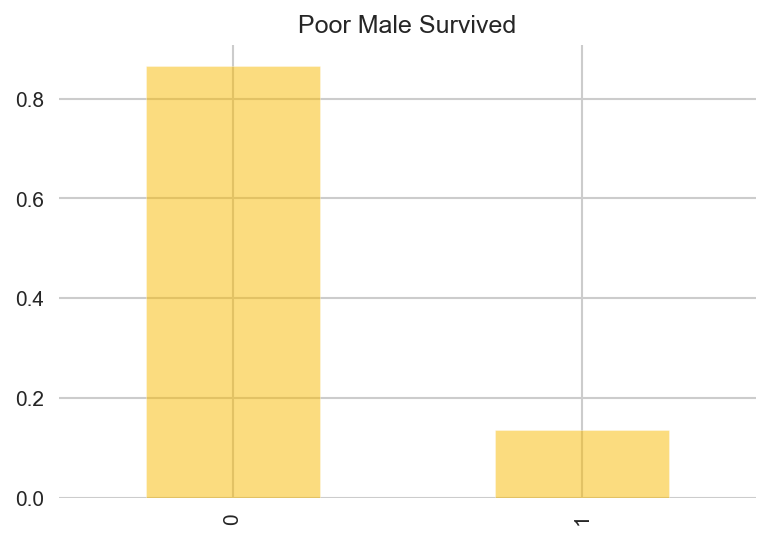

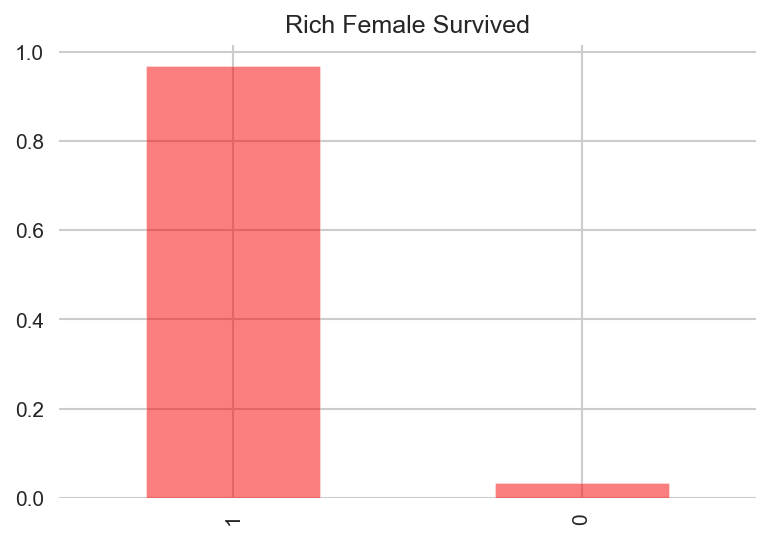

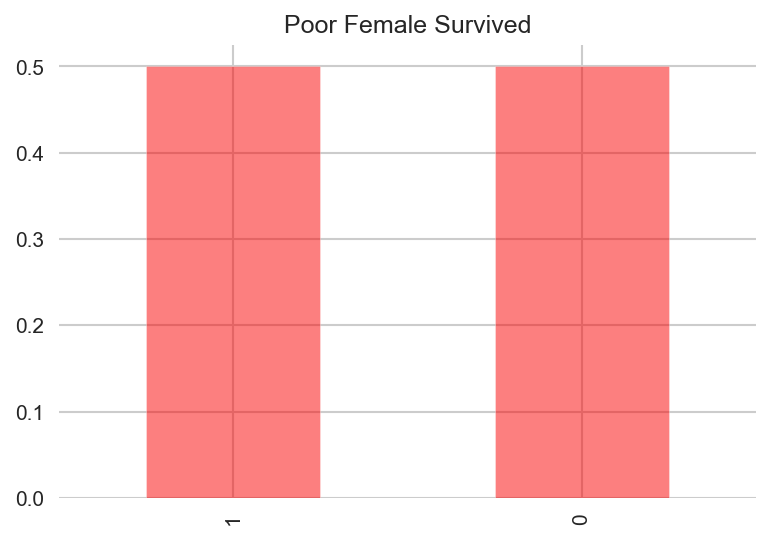

In [46]:
plt.figure(figsize=(6,4),dpi = 150)
plt.subplot2grid((1,1),(0,0)) 
df_train.Survived[(df_train.Sex == 'male') & (df_train.Pclass == 3)].value_counts(normalize = True).plot(kind='bar', alpha = 0.5, color = m_color) 
plt.title('Poor Male Survived') 
plt.show()

plt.figure(figsize=(6,4),dpi = 150)
plt.subplot2grid((1,1),(0,0))  
df_train.Survived[(df_train.Sex == 'female') & (df_train.Pclass == 1)].value_counts(normalize = True).plot(kind='bar', alpha = 0.5, color = f_color) 
plt.title('Rich Female Survived') 
plt.show()

plt.figure(figsize=(6,4),dpi = 150)
plt.subplot2grid((1,1),(0,0))
df_train.Survived[(df_train.Sex == 'female') & (df_train.Pclass == 3)].value_counts(normalize = True).plot(kind='bar', alpha = 0.5, color = f_color) 
plt.title('Poor Female Survived') 
plt.show()


## The plots show:
### 40% of rich men (1st class) survived, 60% of them died;
### 10% of poor men survived, 90% of them died;
### almost 100% of rich women survived, only <1% of them died;
### 50% of poor women survived, rest 50% of them died.

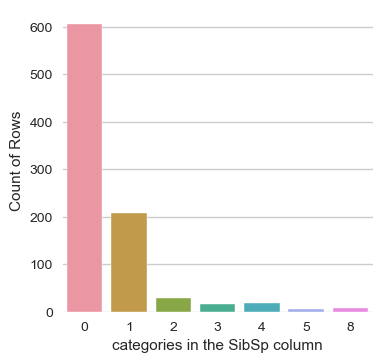

In [47]:
plt.figure(figsize=(4,4), dpi=100)
sns.countplot(x ='SibSp',data=df_train)
plt.xlabel('categories in the SibSp column')
plt.ylabel('Count of Rows')
plt.show()

## Most of the passangers don't have a spouse or siblings
## 418 passangers are present with one or more spouse or siblings

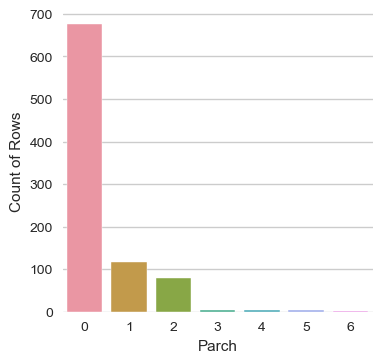

In [48]:
plt.figure(figsize=(4,4), dpi=100)
sns.countplot(x ='Parch',data=df_train)
plt.xlabel('Parch')
plt.ylabel('Count of Rows')
plt.show()

## 307 people were abroad either with their parents or with their childrens

<AxesSubplot:>

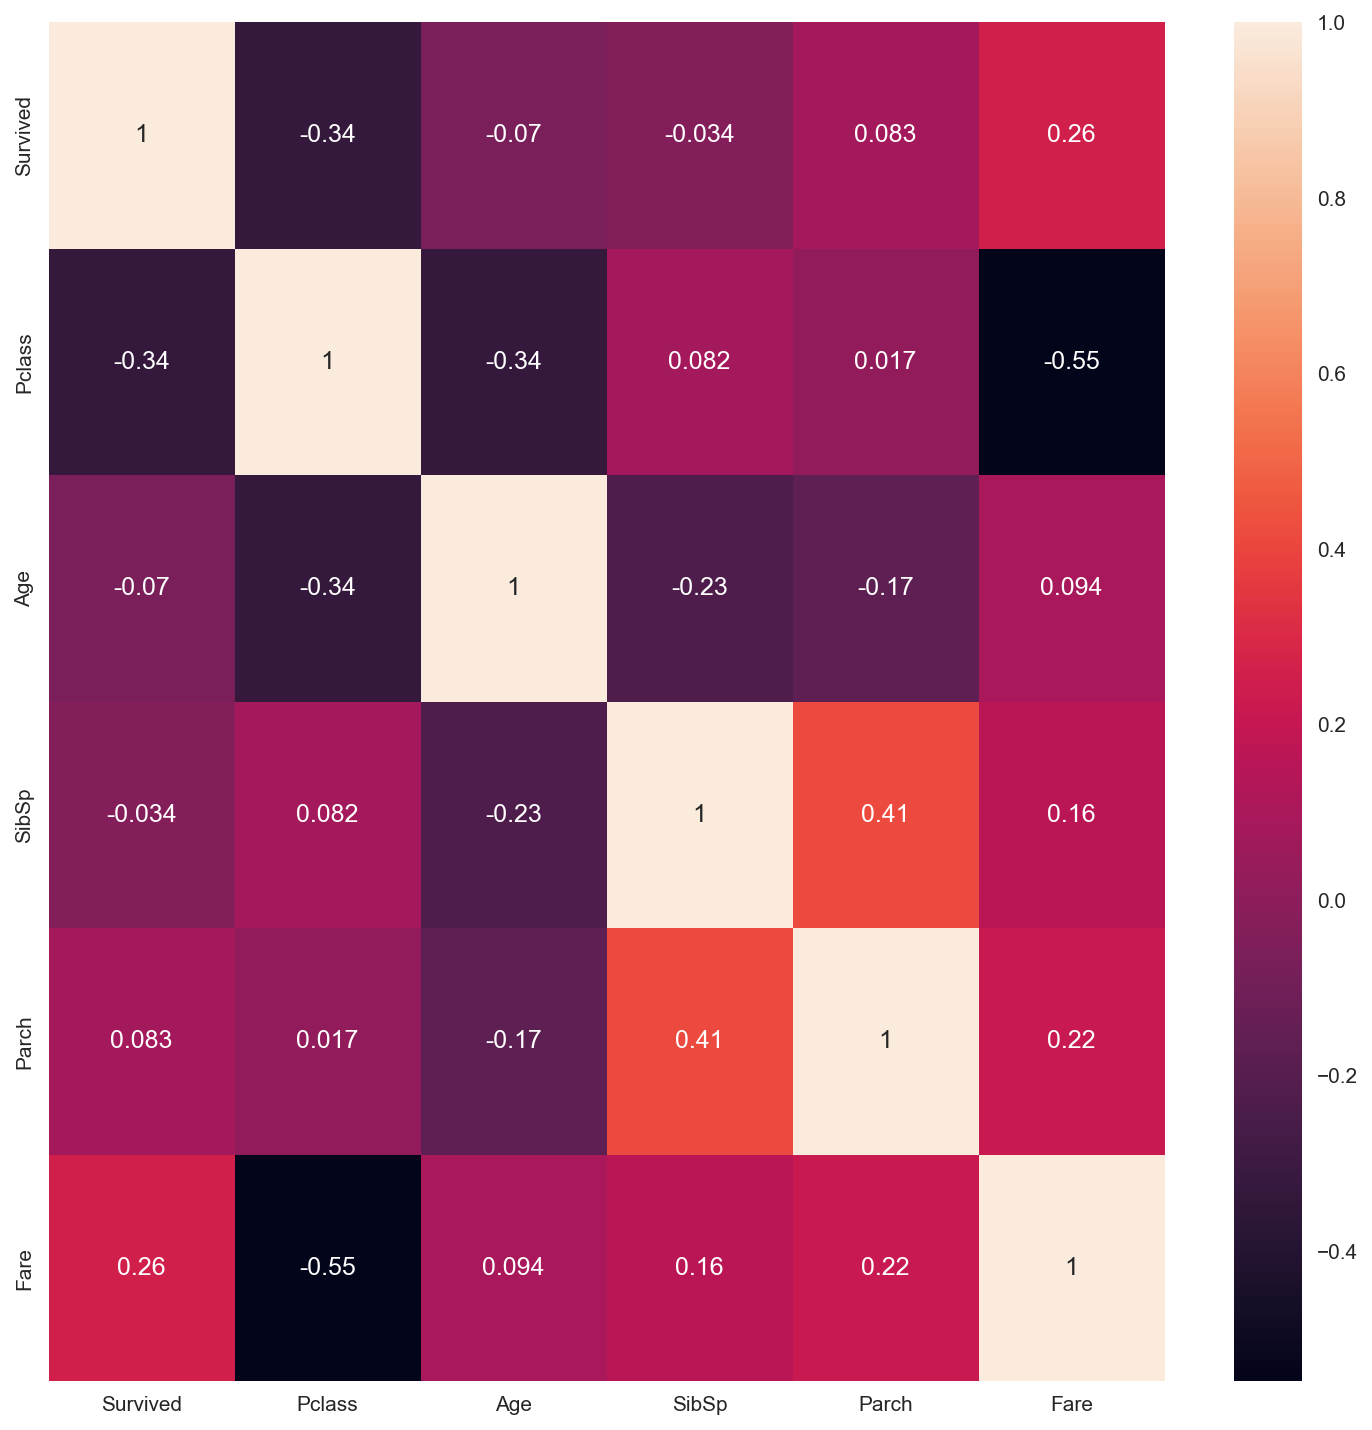

In [49]:
plt.figure(figsize=(12,12), dpi=150)
sns.heatmap(df_train.corr(), annot=True)

In [50]:
df_train.corr()["Survived"].sort_values()

Pclass     -0.335549
Age        -0.069822
SibSp      -0.034040
Parch       0.083151
Fare        0.255290
Survived    1.000000
Name: Survived, dtype: float64

Almost 60% perecent independent varible having negative corelation,
 40% perecent independent varible having positive corelation,

## Converting Features:
### Conveting categerical data into numeric

In [51]:
le = LabelEncoder()
df_train['Sex']=le.fit_transform(df_train['Sex'])
df_train['Embarked'] = le.fit_transform(df_train['Embarked'])


genders = {"male": 0, "female": 1}
data = [df_train]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
    
    
ports = {"S": 0, "C": 1, "Q": 2}
data = [df_train]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

## Checking Outliers

<AxesSubplot:>

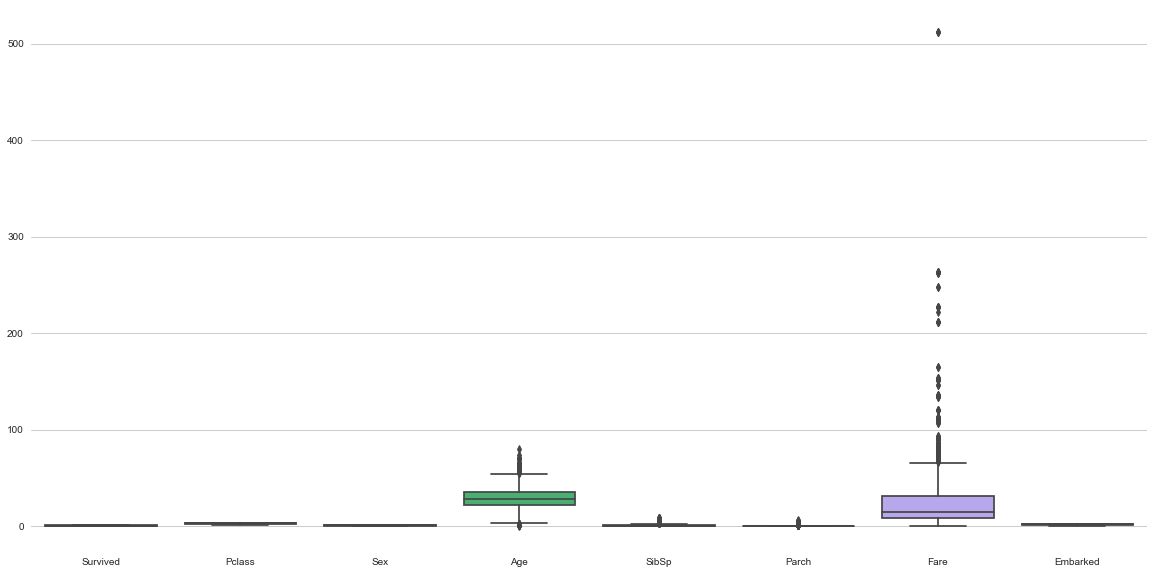

In [52]:
rcParams['figure.figsize'] = 20, 10
sns.boxplot(data = df_train)

Survived       AxesSubplot(0.125,0.657941;0.168478x0.222059)
Pclass      AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Sex         AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Age         AxesSubplot(0.731522,0.657941;0.168478x0.222059)
SibSp          AxesSubplot(0.125,0.391471;0.168478x0.222059)
Parch       AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Fare        AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Embarked    AxesSubplot(0.731522,0.391471;0.168478x0.222059)
dtype: object

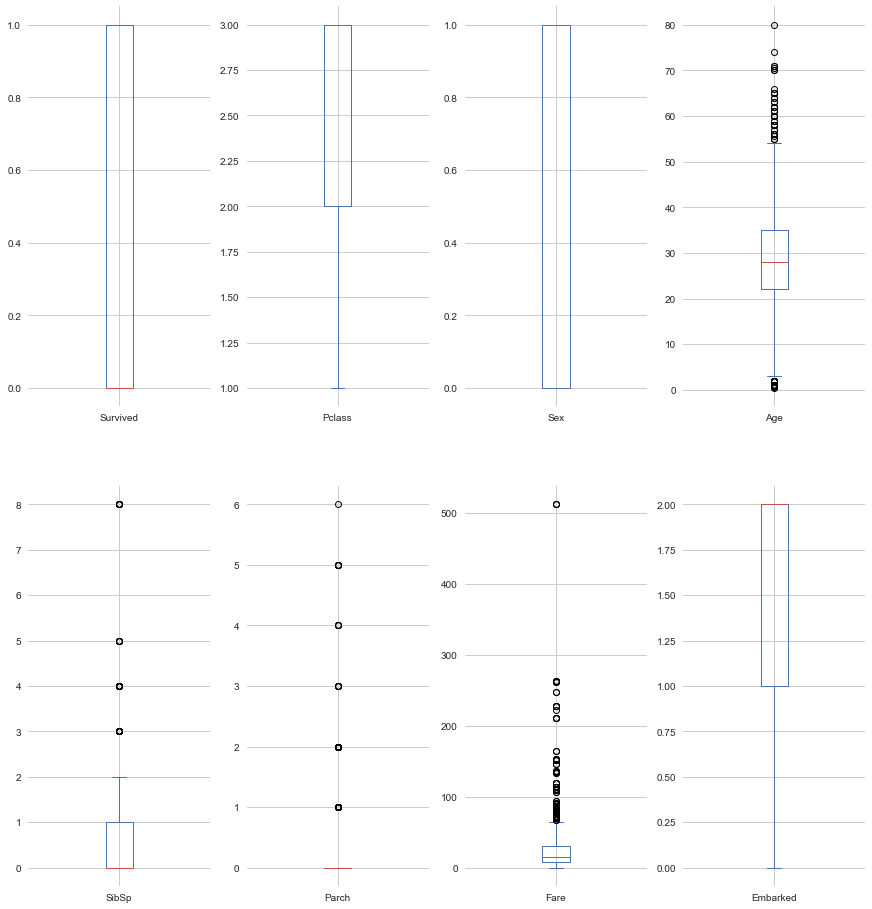

In [53]:
df_train.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,25))
# plotting individual graph for better understanding of graph

## Observation
### Outliers present in data set, and should be processed before modelling

## observations:
### Age , Parch high outliers are present
### Sibsb,fair moderate outliers are present

In [54]:
features = [feature for feature in df_train.columns if df_train[feature].dtype != 'O']
features.remove('Parch')

Survived       AxesSubplot(0.125,0.657941;0.168478x0.222059)
Pclass      AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Sex         AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Age         AxesSubplot(0.731522,0.657941;0.168478x0.222059)
SibSp          AxesSubplot(0.125,0.391471;0.168478x0.222059)
Parch       AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Fare        AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Embarked    AxesSubplot(0.731522,0.391471;0.168478x0.222059)
dtype: object

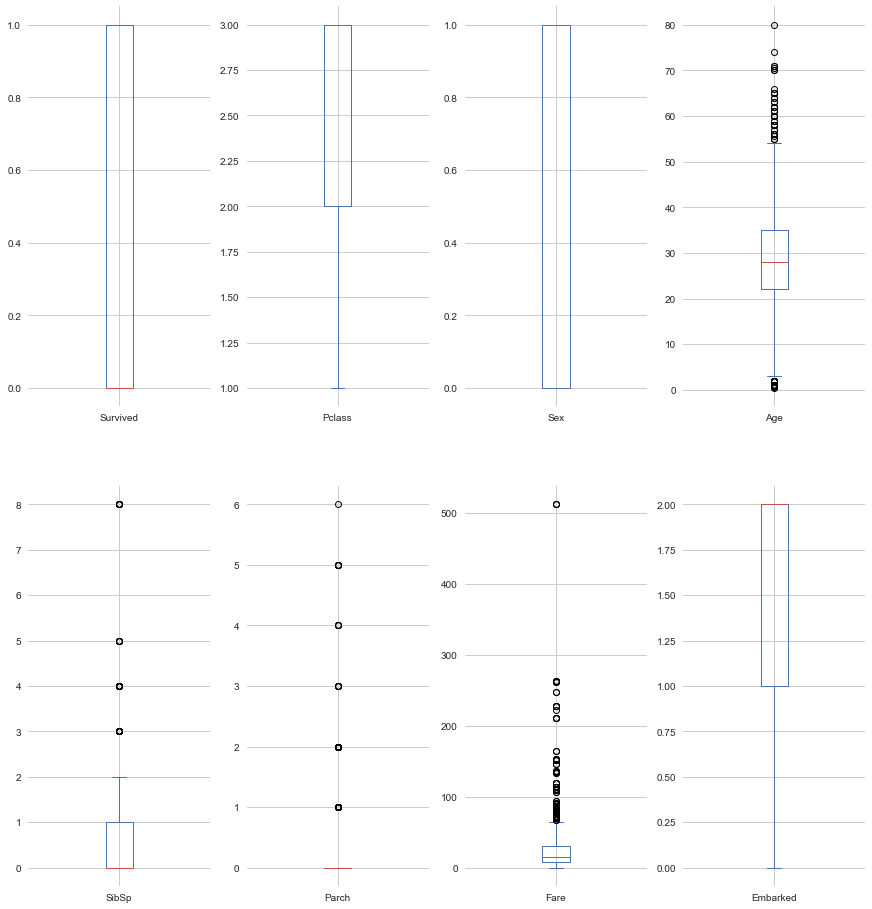

In [55]:
df_train.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,25))

In [56]:
dic = {}
for feature in features:
    IQR = df_train[feature].quantile(0.75) - df_train[feature].quantile(0.25)
    upper_bond = df_train[feature].quantile(0.75) + (IQR * 1.5)
    lower_bond = df_train[feature].quantile(0.25) - (IQR * 1.5)
    
    df_train[feature] = np.where(df_train[feature]>upper_bond,upper_bond,df_train[feature])
    df_train[feature] = np.where(df_train[feature]<lower_bond,lower_bond,df_train[feature])

Survived       AxesSubplot(0.125,0.657941;0.168478x0.222059)
Pclass      AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Sex         AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Age         AxesSubplot(0.731522,0.657941;0.168478x0.222059)
SibSp          AxesSubplot(0.125,0.391471;0.168478x0.222059)
Parch       AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Fare        AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Embarked    AxesSubplot(0.731522,0.391471;0.168478x0.222059)
dtype: object

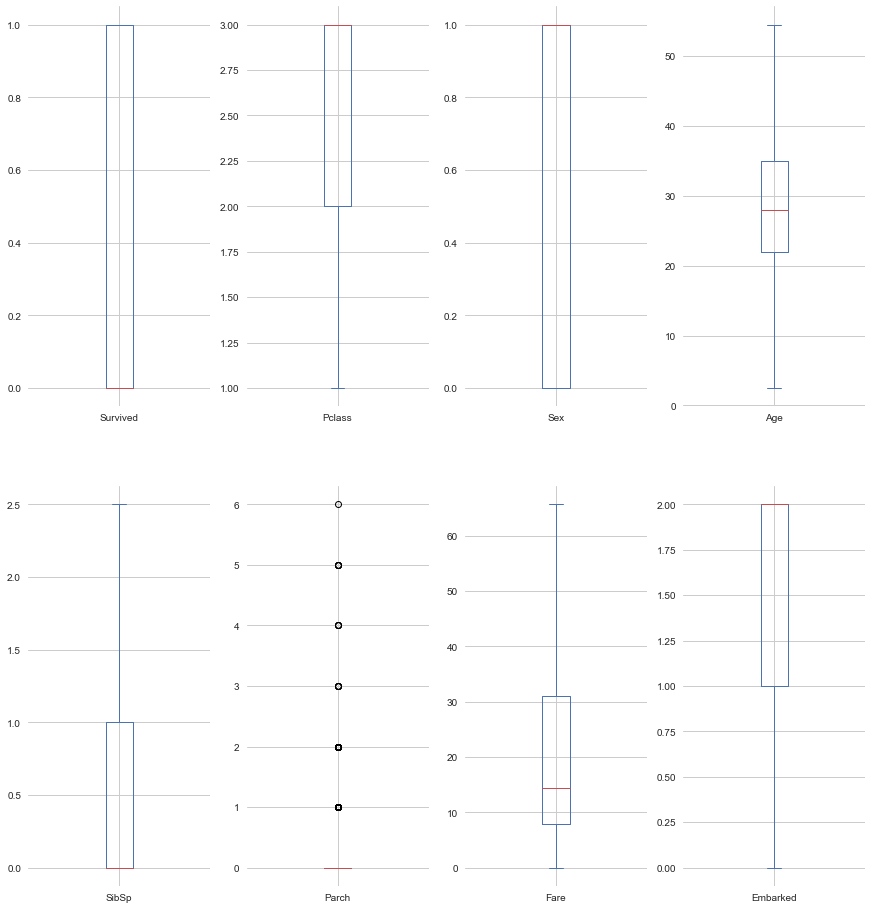

In [57]:
df_train.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,25))

## Now in our dataset is no outlier present 

# Skewness Checking

<AxesSubplot:xlabel='Survived', ylabel='Density'>

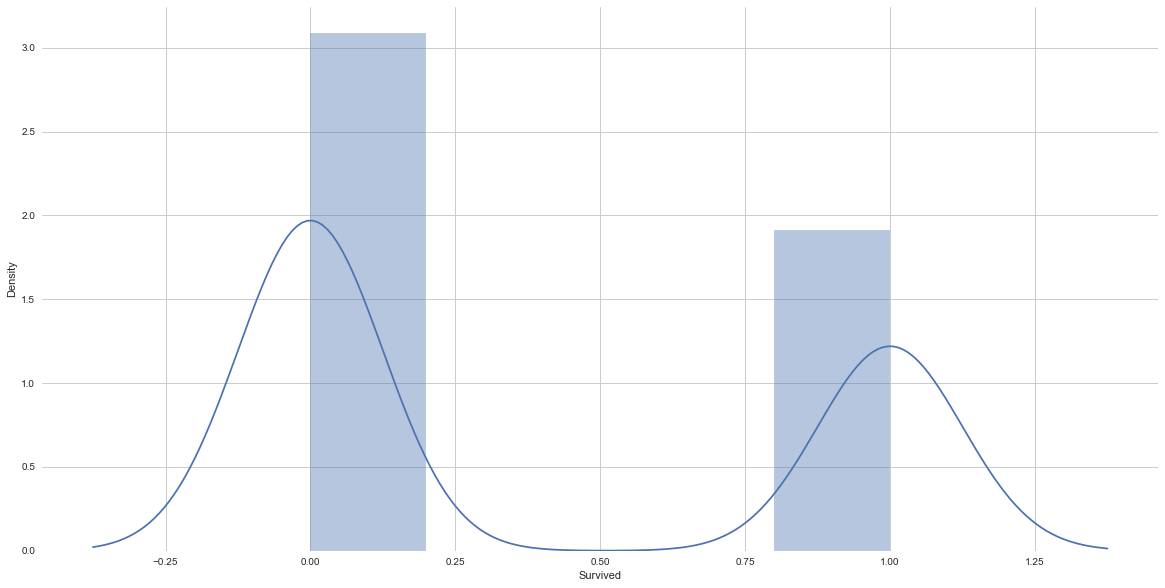

In [58]:
sns.distplot(df_train['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

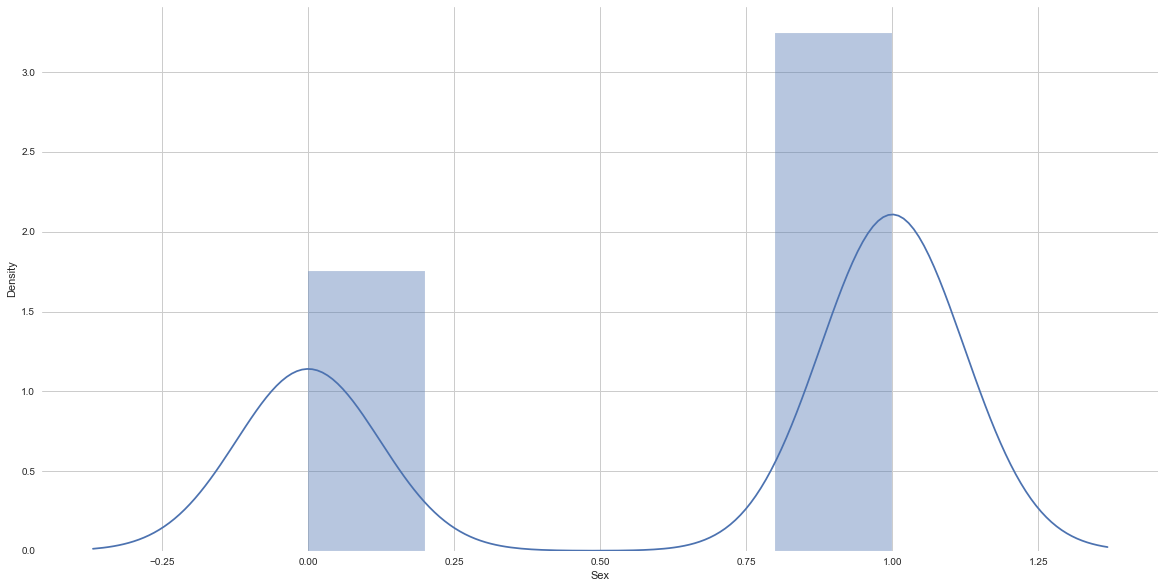

In [59]:
sns.distplot(df_train['Sex'])

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

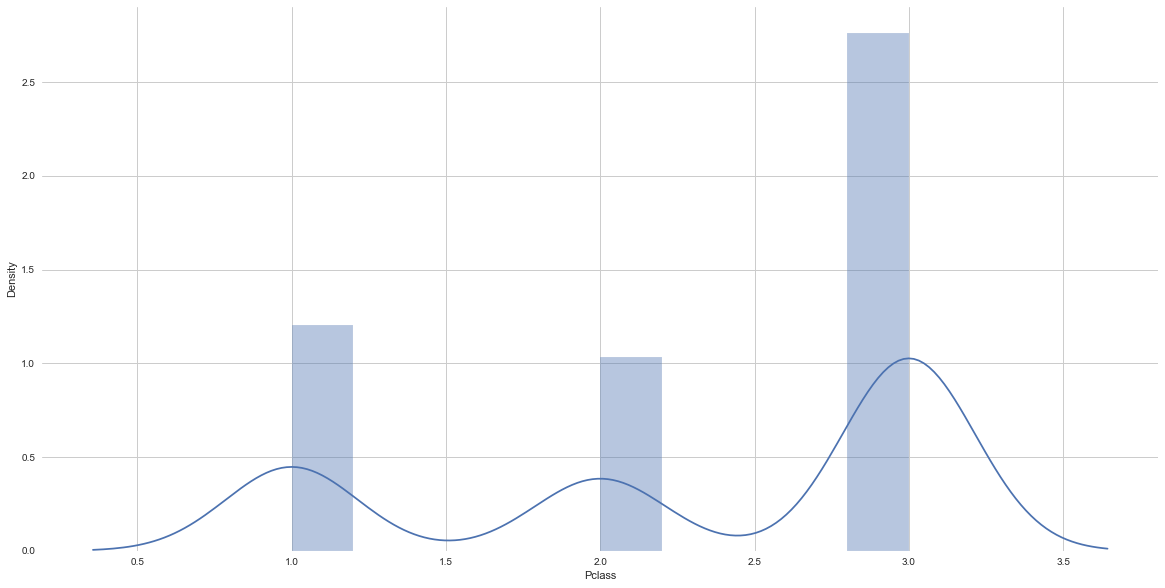

In [60]:
sns.distplot(df_train['Pclass'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

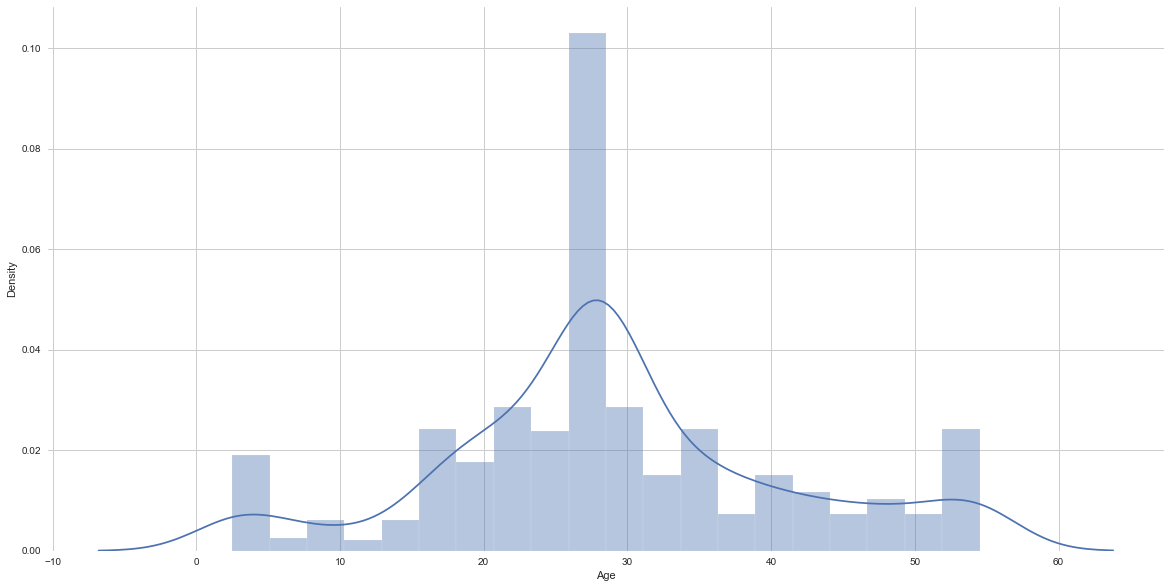

In [61]:
sns.distplot(df_train['Age'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

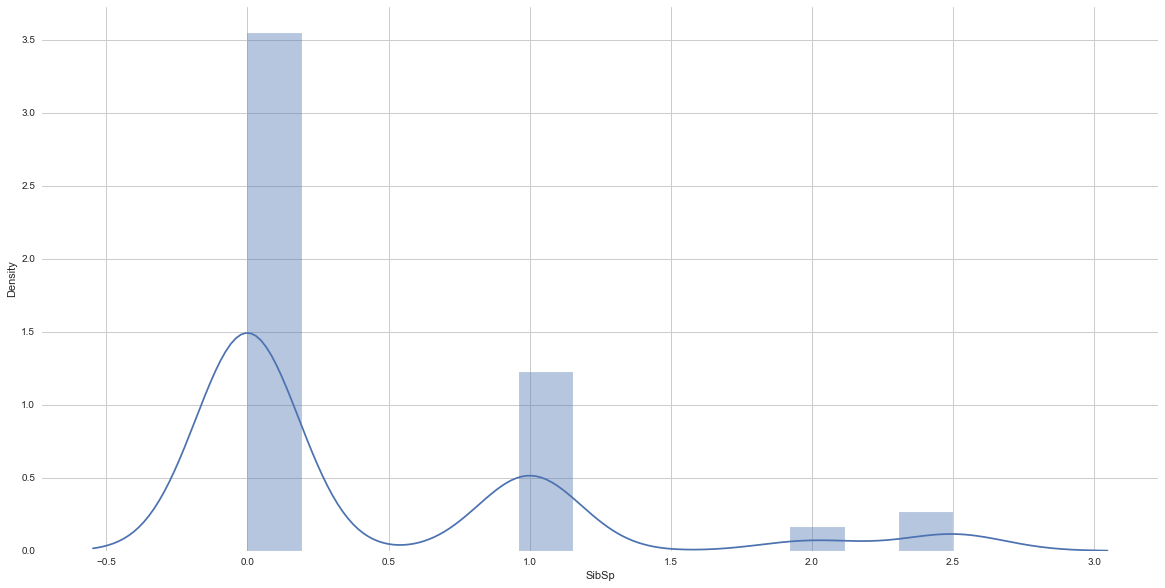

In [62]:
sns.distplot(df_train['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

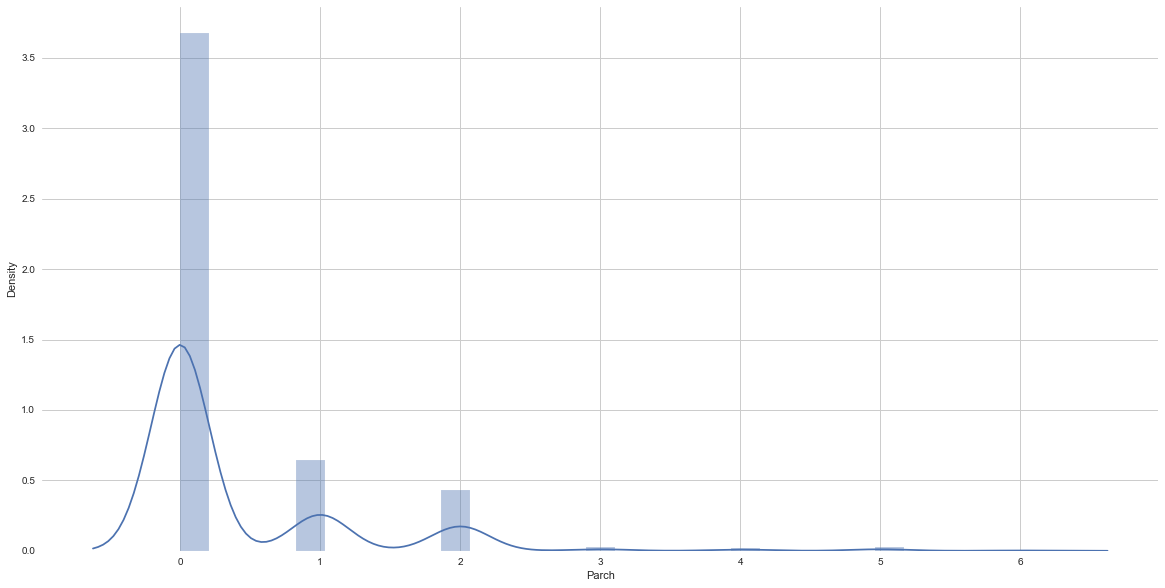

In [63]:
sns.distplot(df_train['Parch'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

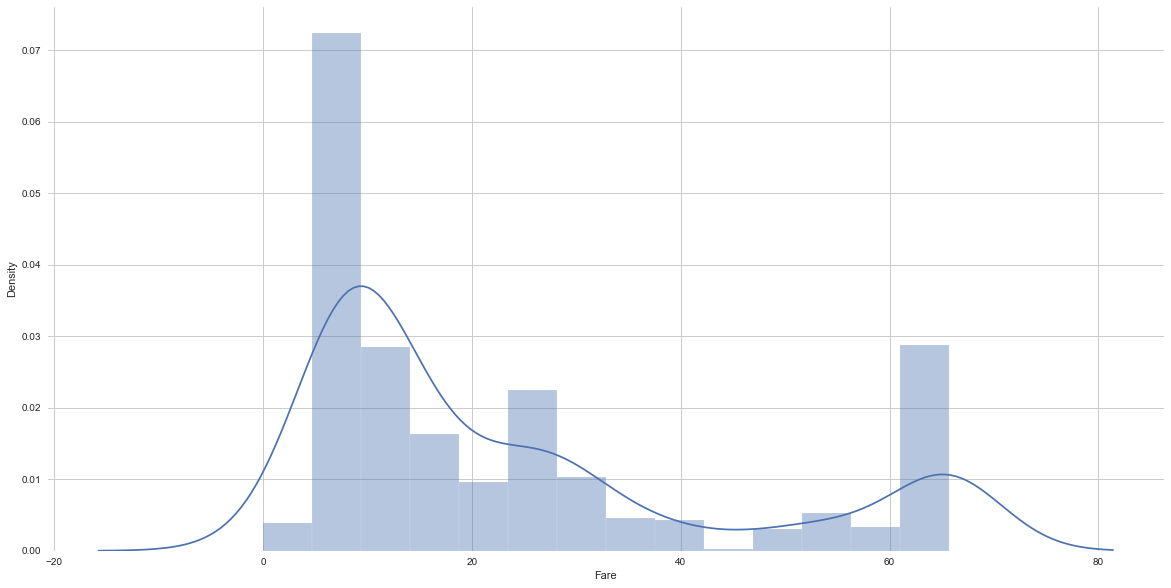

In [64]:
sns.distplot(df_train['Fare'])

<AxesSubplot:xlabel='Embarked', ylabel='Density'>

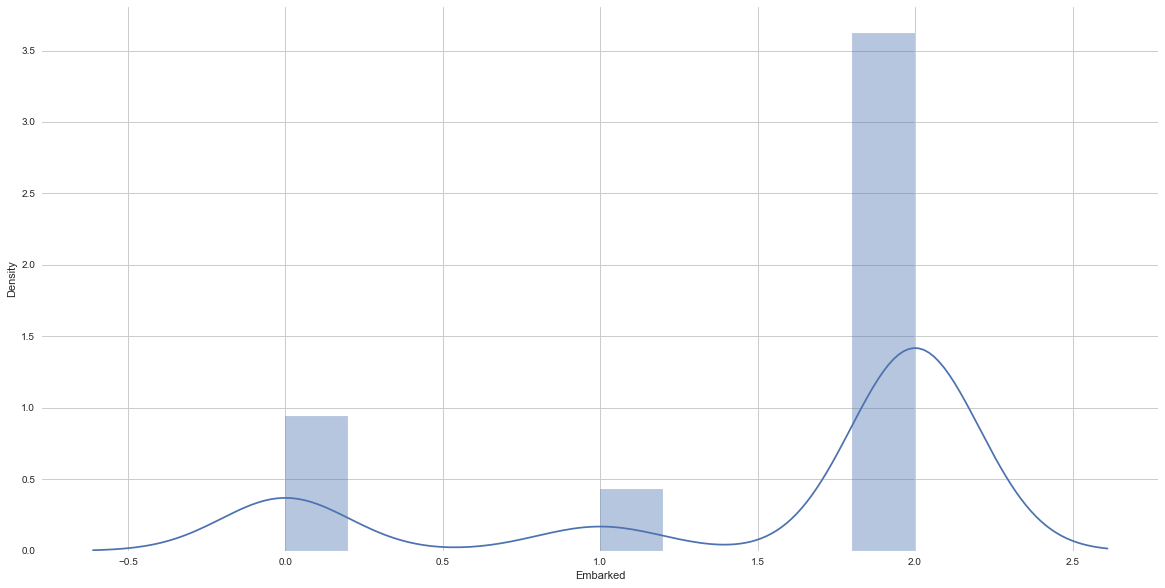

In [65]:
sns.distplot(df_train['Embarked'])

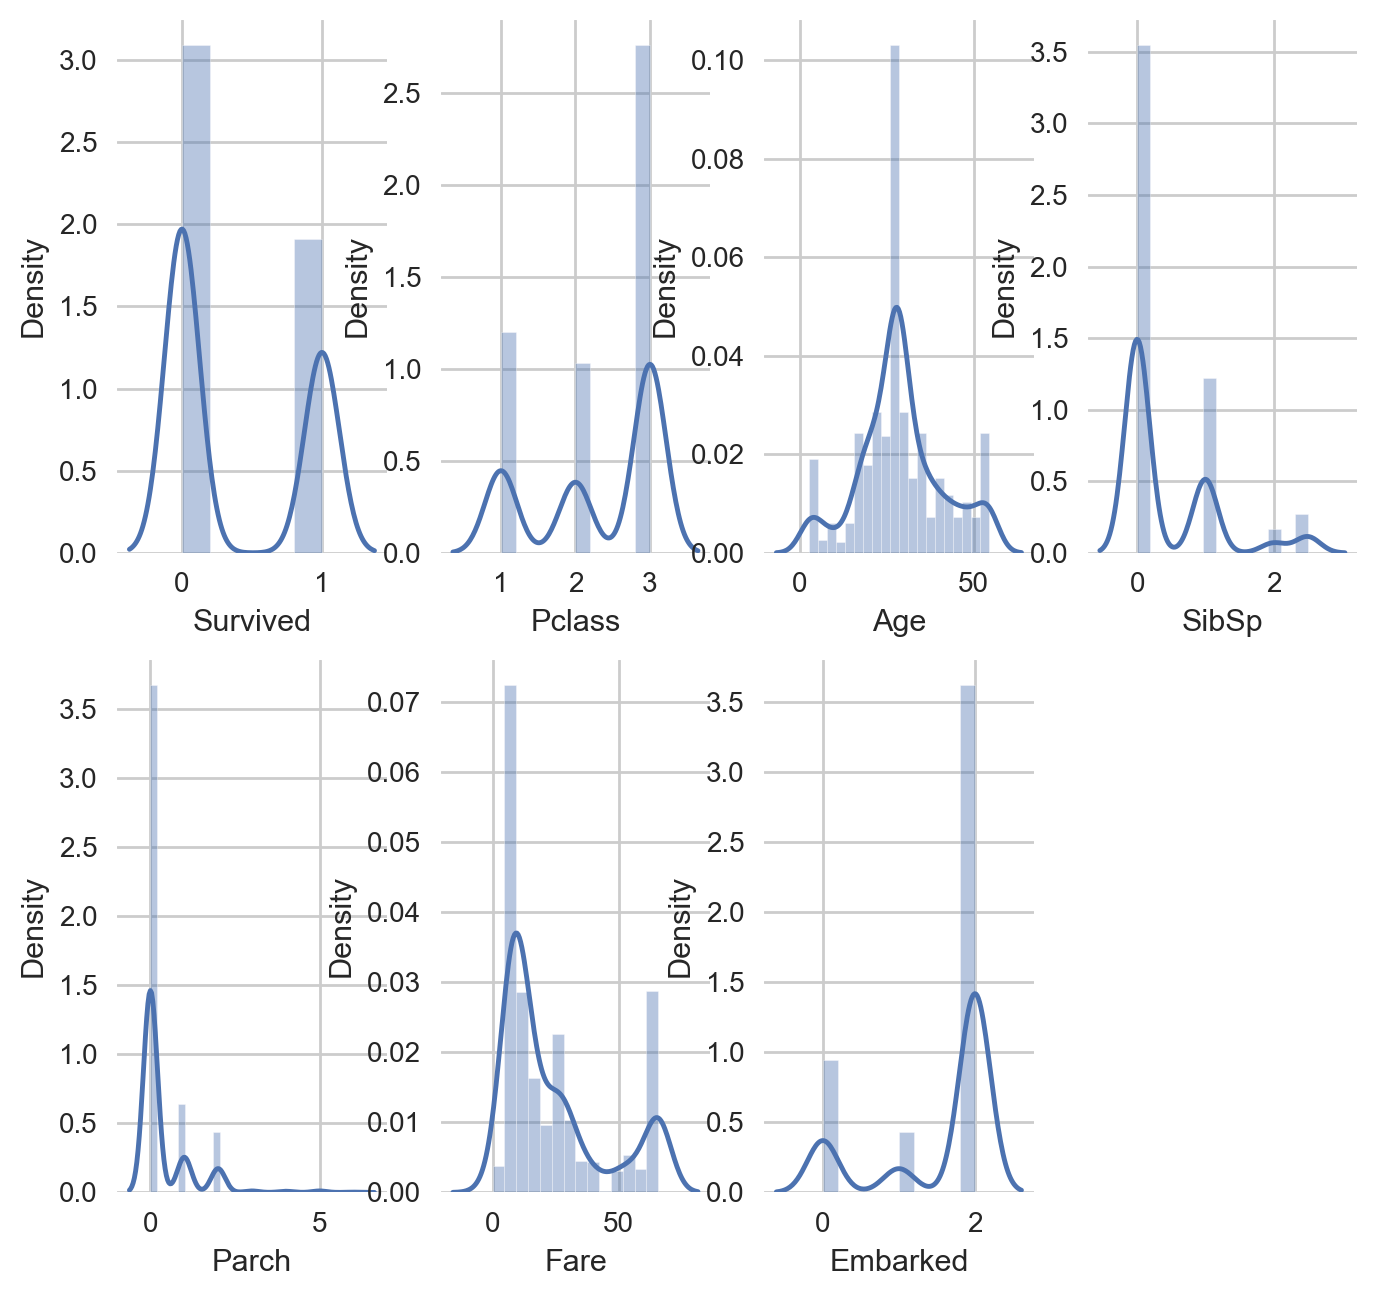

In [66]:
plt.figure(figsize=(8,12),dpi=200)
for i in enumerate(df_train[df_train.columns.drop('Sex')]):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df_train[i[1]],color='b')

## Observations:

Skewness threshold usually taken as -0.5 to 0.5

referring the above distplot and histogram graphs and values we can infer:


## Model Selection
Our target variable is "Survived", with a descrete value of 0 or 1 which means we have to choose a classification model. In Classification model there are:-

## Logstic Regression
## Descision Tree
## XGBoost
## SVM
## Random Forest
## Gradient-boosted tree
## Multilayer perceptron


In [83]:
x1=df_train.iloc[:,:-1]  # Dropping last column from data frame
y1=df_train.iloc[:,0]

In [84]:
x1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,3.0,1.0,22.0,1.0,0,7.2500
1,1.0,1.0,0.0,38.0,1.0,0,65.6563
2,1.0,3.0,0.0,26.0,0.0,0,7.9250
3,1.0,1.0,0.0,35.0,1.0,0,53.1000
4,0.0,3.0,1.0,35.0,0.0,0,8.0500
...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.0,0.0,0,13.0000
887,1.0,1.0,0.0,19.0,0.0,0,30.0000
888,0.0,3.0,0.0,28.0,1.0,2,23.4500
889,1.0,1.0,1.0,26.0,0.0,0,30.0000


In [85]:
y1

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 889, dtype: float64

In [86]:
x1.shape

(889, 7)

In [87]:
x1.skew()

Survived    0.484568
Pclass     -0.636998
Sex        -0.625625
Age         0.164202
SibSp       1.617747
Parch       2.745160
Fare        1.091279
dtype: float64

# Variance Inflation Factor

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [89]:
calc_vif(x1)

,variables,VIF FACTOR
0,Survived,2.191166
1,Pclass,5.936780
2,Sex,3.781553
3,Age,6.091534
4,SibSp,2.069828
5,Parch,1.661394
6,Fare,4.439455


# Scaling the independant variable (x) to get all the columns in a standard scale

In [124]:
sc=StandardScaler()
x1=sc.fit_transform(x1)
x1

array([[-0.78696114,  0.82520863,  0.73534203, ...,  0.80828635,
        -0.47432585, -0.81878364],
       [ 1.27071078, -1.57221121, -1.35991138, ...,  0.80828635,
        -0.47432585,  2.04377756],
       [ 1.27071078,  0.82520863, -1.35991138, ..., -0.60343578,
        -0.47432585, -0.7857011 ],
       ...,
       [-0.78696114,  0.82520863, -1.35991138, ...,  0.80828635,
         2.00611934, -0.02480266],
       [ 1.27071078, -1.57221121,  0.73534203, ..., -0.60343578,
        -0.47432585,  0.29622052],
       [-0.78696114,  0.82520863,  0.73534203, ..., -0.60343578,
        -0.47432585, -0.79427805]])

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=43)

In [129]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

In [130]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=43)

************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 1.0
Cross-val-score= 1.0


roc_auc_score 1.0


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       110
         1.0       1.00      1.00      1.00        68

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



[[110   0]
 [  0  68]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


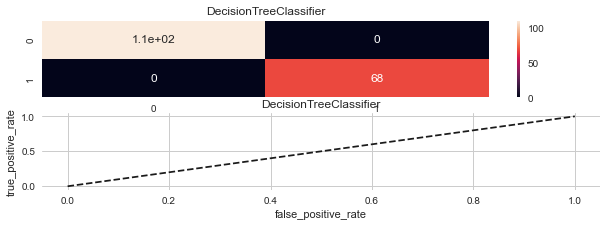

************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 1.0
Cross-val-score= 1.0


roc_auc_score 1.0


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       110
         1.0       1.00      1.00      1.00        68

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



[[110   0]
 [  0  68]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


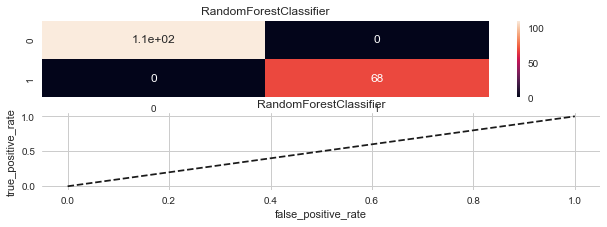

************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 1.0
Cross-val-score= 0.995774647887324


roc_auc_score 1.0


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       110
         1.0       1.00      1.00      1.00        68

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



[[110   0]
 [  0  68]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


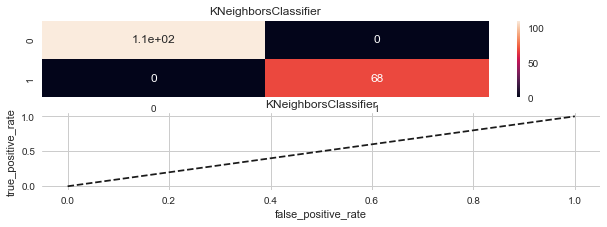

************** SGDClassifier ***********


SGDClassifier()


accuracy score 1.0
Cross-val-score= 0.9985915492957746


roc_auc_score 1.0


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       110
         1.0       1.00      1.00      1.00        68

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



[[110   0]
 [  0  68]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


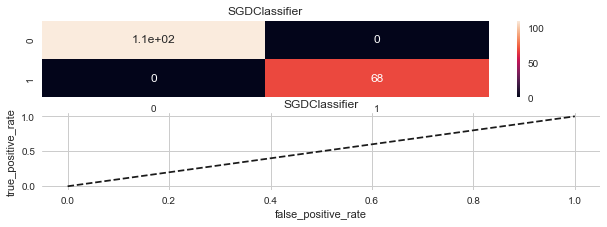

************** LogisticRegression ***********


LogisticRegression()


accuracy score 1.0
Cross-val-score= 1.0


roc_auc_score 1.0


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       110
         1.0       1.00      1.00      1.00        68

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



[[110   0]
 [  0  68]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


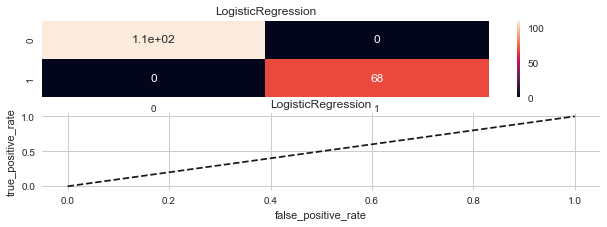

In [132]:
#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10)
    # ---------------------------------------------------------------------------------------------------------
    
    cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    # ---------------------------------------------------------------------------------------------------------
        
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

# Logistic Regression

In [133]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=lg,param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [134]:
clf_lr.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [135]:
clf_lr.best_score_ # the best accuracy obtained by Grid search on the train set.

1.0

In [136]:
clf_lr_df = pd.DataFrame(clf_lr.cv_results_)
clf_lr_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000402,0.000493,0.000000,0.000000,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1,0.019815,0.047449,0.000250,0.000403,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.833333,0.760563,0.816901,0.746479,0.774648,0.746479,0.732394,0.760563,0.71831,0.774648,0.766432,0.033908,7
2,0.001551,0.004652,0.000000,0.000000,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,0.001562,0.004686,0.001563,0.004688,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1
4,0.000000,0.000000,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
5,0.006135,0.006556,0.000283,0.000595,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1
6,0.000399,0.000488,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
7,0.002567,0.004672,0.000100,0.000299,1,l2,"{'C': 1, 'penalty': 'l2'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1
8,0.000000,0.000000,0.000000,0.000000,10,l1,"{'C': 10, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
9,0.006889,0.000538,0.000698,0.000457,10,l2,"{'C': 10, 'penalty': 'l2'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1


In [137]:
pred=clf_lr.predict(x_test)
accuracy_score(pred,y_test)

1.0

# KNN

In [138]:
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [139]:
clf_knn.best_score_

0.9985915492957746

In [140]:
clf_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 1}

In [141]:
clf_knn_df = pd.DataFrame(clf_knn.cv_results_)
clf_knn_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_jobs,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001197,0.000978,0.280894,0.809297,-1,1,"{'n_jobs': -1, 'n_neighbors': 1}",1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.985915,1.000000,1.000000,1.000000,0.998592,0.004225,1
1,0.001562,0.004686,0.012541,0.005697,-1,2,"{'n_jobs': -1, 'n_neighbors': 2}",1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.985915,1.000000,1.000000,1.000000,0.998592,0.004225,1
2,0.001562,0.004687,0.009410,0.008532,-1,3,"{'n_jobs': -1, 'n_neighbors': 3}",1.000000,1.0,0.985915,1.000000,1.000000,0.985915,0.985915,1.000000,1.000000,1.000000,0.995775,0.006454,3
3,0.002363,0.004474,0.011841,0.004245,-1,4,"{'n_jobs': -1, 'n_neighbors': 4}",1.000000,1.0,0.985915,0.985915,1.000000,0.985915,0.985915,1.000000,1.000000,1.000000,0.994366,0.006900,5
4,0.000100,0.000299,0.011623,0.006435,-1,5,"{'n_jobs': -1, 'n_neighbors': 5}",1.000000,1.0,0.985915,1.000000,1.000000,0.985915,0.985915,1.000000,1.000000,1.000000,0.995775,0.006454,3
5,0.003124,0.006249,0.010979,0.007725,-1,6,"{'n_jobs': -1, 'n_neighbors': 6}",1.000000,1.0,0.985915,0.985915,1.000000,0.985915,0.985915,1.000000,1.000000,1.000000,0.994366,0.006900,5
6,0.003771,0.005613,0.010564,0.005535,-1,7,"{'n_jobs': -1, 'n_neighbors': 7}",1.000000,1.0,0.985915,0.985915,1.000000,0.985915,0.985915,1.000000,1.000000,1.000000,0.994366,0.006900,5
7,0.000100,0.000299,0.012671,0.005318,-1,8,"{'n_jobs': -1, 'n_neighbors': 8}",1.000000,1.0,0.985915,0.985915,1.000000,0.985915,0.985915,1.000000,1.000000,1.000000,0.994366,0.006900,5
8,0.001562,0.004686,0.009416,0.006819,-1,9,"{'n_jobs': -1, 'n_neighbors': 9}",1.000000,1.0,0.985915,0.985915,1.000000,0.985915,0.985915,1.000000,1.000000,1.000000,0.994366,0.006900,5
9,0.000698,0.000779,0.012433,0.004483,-1,10,"{'n_jobs': -1, 'n_neighbors': 10}",1.000000,1.0,0.985915,0.985915,1.000000,0.985915,0.985915,1.000000,1.000000,0.985915,0.992958,0.007042,15


In [142]:
pred=clf_knn.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

1.0

# Random Forcast

In [143]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500]},
             scoring='accuracy')

In [144]:
clf_rf.best_score_

1.0

In [145]:
clf_rf.best_params_

{'max_features': 'auto', 'n_estimators': 500}

In [146]:
clf_rf.best_params_

{'max_features': 'auto', 'n_estimators': 500}

In [147]:
pred=clf_rf.predict(x_test)
print(round(accuracy_score(pred,y_test), 3) * 100, '%')   # actual accuarcy on our test s

100.0 %


# Gradient Boosting

In [148]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [500]})

In [149]:
clf_gb.best_score_

1.0

In [150]:
clf_gb.best_params_

{'n_estimators': 500}

In [151]:
clf_gb_df = pd.DataFrame(clf_gb.cv_results_)
clf_gb_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.307107,0.027572,0.001112,0.000536,500,{'n_estimators': 500},1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [152]:
pred=clf_gb.predict(x_test)
accuracy_score(pred,y_test)

1.0

# SVM

In [153]:
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [154]:
clf.best_score_

1.0

In [155]:
clf.best_params_

{'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}

In [156]:
# now tuning finally around these values of C and gamma and the kernel for further increasing the accuracy.
params_dict={'C':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'gamma':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'kernel':['linear','rbf']}
clf_svm=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_svm.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5],
                         'gamma': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [157]:
clf_svm.best_score_

1.0

In [158]:
clf_svm.best_params_

{'C': 0.9, 'gamma': 0.9, 'kernel': 'linear'}

In [159]:
clf_svm_df = pd.DataFrame(clf_svm.cv_results_)
clf_svm_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001198,0.000401,0.000498,0.000498,0.9,0.9,linear,"{'C': 0.9, 'gamma': 0.9, 'kernel': 'linear'}",1.0,1.0,...,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
1,0.013662,0.002096,0.002893,0.000828,0.9,0.9,rbf,"{'C': 0.9, 'gamma': 0.9, 'kernel': 'rbf'}",1.0,1.0,...,0.985915,0.985915,0.957746,1.0,1.0,1.000000,1.0,0.991549,0.012909,57
2,0.001097,0.000299,0.000797,0.000398,0.9,0.92,linear,"{'C': 0.9, 'gamma': 0.92, 'kernel': 'linear'}",1.0,1.0,...,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
3,0.013165,0.001985,0.003090,0.001041,0.9,0.92,rbf,"{'C': 0.9, 'gamma': 0.92, 'kernel': 'rbf'}",1.0,1.0,...,0.985915,0.985915,0.957746,1.0,1.0,1.000000,1.0,0.991549,0.012909,57
4,0.001199,0.000398,0.000498,0.000498,0.9,0.96,linear,"{'C': 0.9, 'gamma': 0.96, 'kernel': 'linear'}",1.0,1.0,...,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.013569,0.001278,0.003390,0.000663,1.5,1.0,rbf,"{'C': 1.5, 'gamma': 1.0, 'kernel': 'rbf'}",1.0,1.0,...,0.985915,0.985915,0.957746,1.0,1.0,1.000000,1.0,0.991549,0.012909,57
94,0.001189,0.000735,0.000399,0.000489,1.5,1.2,linear,"{'C': 1.5, 'gamma': 1.2, 'kernel': 'linear'}",1.0,1.0,...,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
95,0.017154,0.003023,0.003491,0.001013,1.5,1.2,rbf,"{'C': 1.5, 'gamma': 1.2, 'kernel': 'rbf'}",1.0,1.0,...,0.985915,0.985915,0.957746,1.0,1.0,0.985915,1.0,0.990141,0.012676,85
96,0.001196,0.000402,0.000599,0.000663,1.5,1.5,linear,"{'C': 1.5, 'gamma': 1.5, 'kernel': 'linear'}",1.0,1.0,...,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,0.000000,1


In [160]:
pred=clf_svm.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

1.0

In [161]:
# Save File
import pickle
file = "Titanic Project"
#save file
save = pickle.dump(clf_svm,open(file,'wb'))